<a href="https://colab.research.google.com/github/lawsonk16/Object-Detection/blob/main/Centerpoint_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Psuedo-Centerpoint Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 1: Imports

In [2]:
import sys
paths = ['/content/drive/MyDrive/Colab Notebooks/scripts']

for p in paths:
    sys.path.append(p)

import os
import json
import shutil

from coco_utils.coco_help import *

## Step 2: Import Data

### 2.1 Import Chipped Data

In [3]:
data_zip_path = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/DOTA/DOTA_512.zip'

data_path_c = '/content/DOTA_512/'
os.mkdir(data_path_c)

shutil.copy2(data_zip_path, '/content/')

shutil.unpack_archive(data_zip_path.split('/')[-1], data_path_c)
os.remove(data_zip_path.split('/')[-1])

In [4]:
train_ims_c = f'{data_path_c}train/images/'
val_ims_c = f'{data_path_c}val/images/'

train_anns_c = f'{data_path_c}train/coco_train_512.json'
val_anns_c = f'{data_path_c}val/coco_val_512.json'

make_cat_ids_match(train_anns_c, val_anns_c) 

### 2.2 Import Full Dataset
 - Take GSD values from this data and port them over

In [5]:
data_zip_path = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/DOTA/DOTA-COCO.zip'
data_path = '/content/DOTA/'

os.mkdir(data_path)

shutil.copy2(data_zip_path, '/content/')

shutil.unpack_archive(data_zip_path.split('/')[-1], data_path)
os.remove(data_zip_path.split('/')[-1])

In [6]:
train_ims = f'{data_path}train/images/'
val_ims = f'{data_path}val/images/'

train_anns = f'{data_path}train/train_COCO.json'
val_anns = f'{data_path}val/val_COCO.json'

# make all of the annotations use matching category IDs, just in case
make_cat_ids_match(train_anns_c, train_anns) 
make_cat_ids_match(train_anns, val_anns) 

## Step 3: Convert Data 

In [7]:
# add gsd values to the chipped images
new_train_fp = add_gsd_to_chips(train_anns, train_anns_c)
new_val_fp = add_gsd_to_chips(val_anns, val_anns_c)

Adding GSD to Images: 100%|██████████| 4036/4036 [00:00<00:00, 48914.01it/s]


In [8]:
# add size estimates in meters to the object categories
make_cat_ids_match(new_train_fp, new_val_fp) 
estimates = estimate_category_size(new_train_fp, True, [new_val_fp])

100%|██████████| 175185/175185 [01:42<00:00, 1715.92it/s]


In [9]:
# add centerpoints to the annotations
train_c_cp = convert_anns_centerpoint(new_train_fp)
val_c_cp = convert_anns_centerpoint(new_val_fp)

In [10]:
# get the average image gsd value
avg_img_gsd = get_average_image_gsd(train_c_cp)

# convert bounding boxes to square boxes around centerpoints based on gsd and 
# average object size
train_anns_sq = average_bboxes_from_centerpoints(train_c_cp, avg_img_gsd = avg_img_gsd)
val_anns_sq = average_bboxes_from_centerpoints(val_c_cp, avg_img_gsd = avg_img_gsd)

Creating Square Bboxes: 100%|██████████| 59041/59041 [00:08<00:00, 6855.36it/s]


<Figure size 432x288 with 0 Axes>

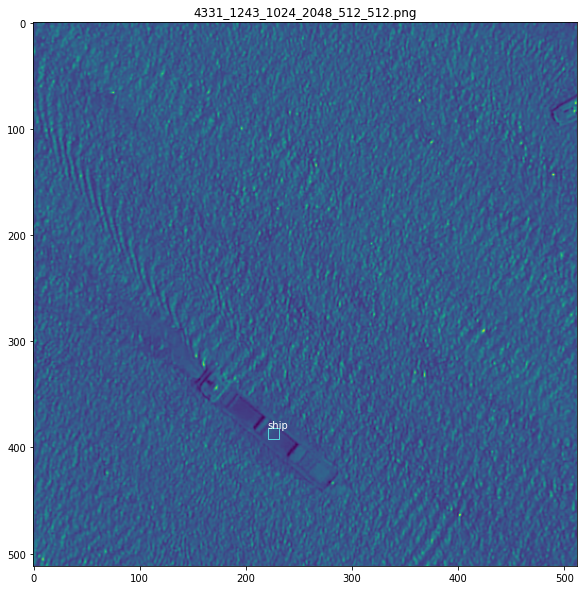

<Figure size 432x288 with 0 Axes>

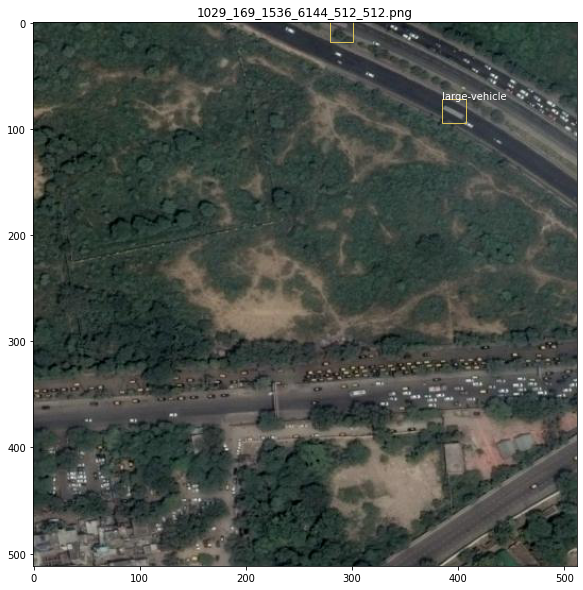

<Figure size 432x288 with 0 Axes>

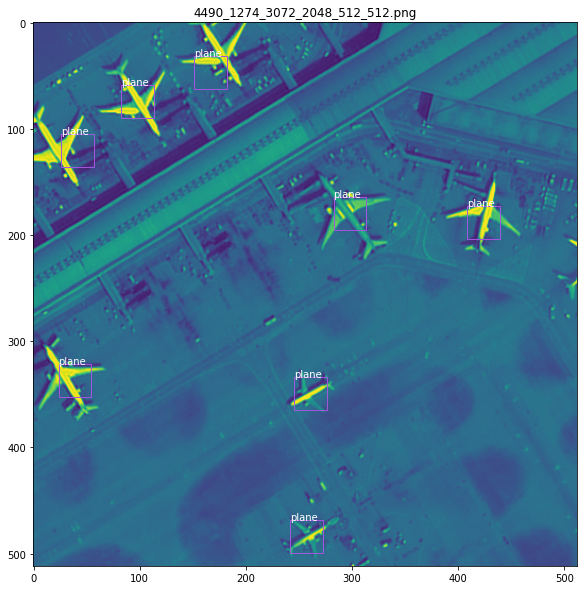

<Figure size 432x288 with 0 Axes>

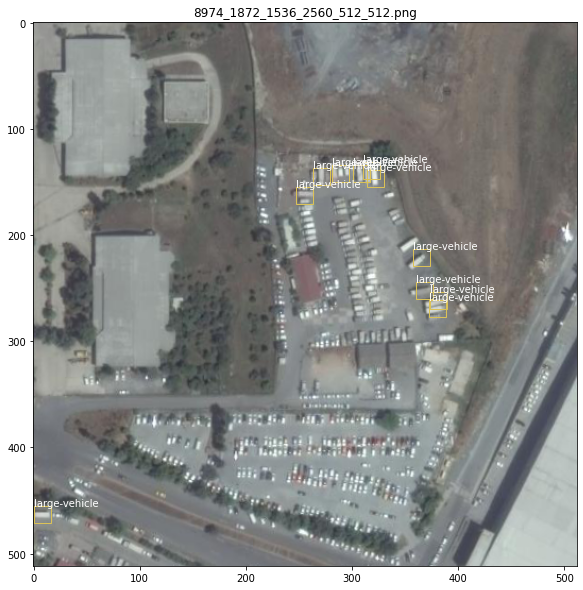

<Figure size 432x288 with 0 Axes>

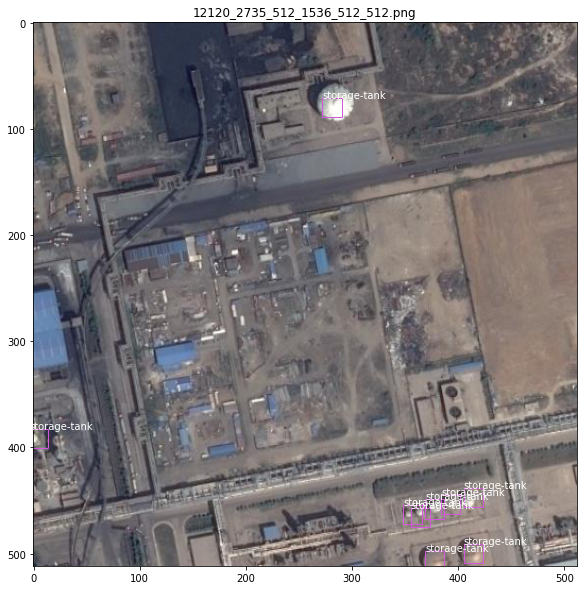

<Figure size 432x288 with 0 Axes>

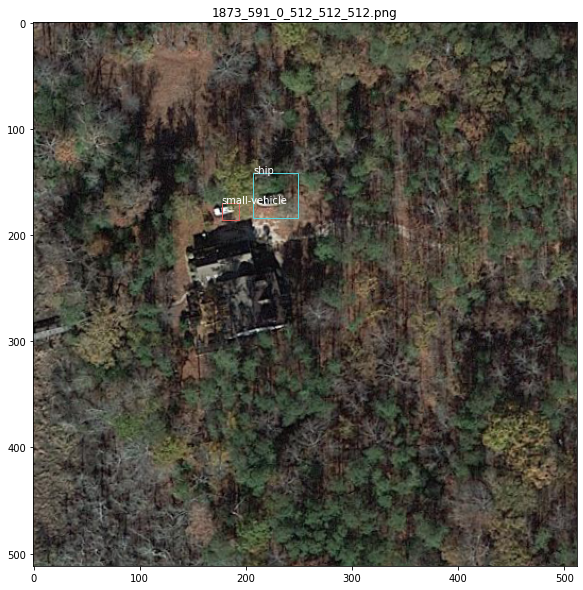

<Figure size 432x288 with 0 Axes>

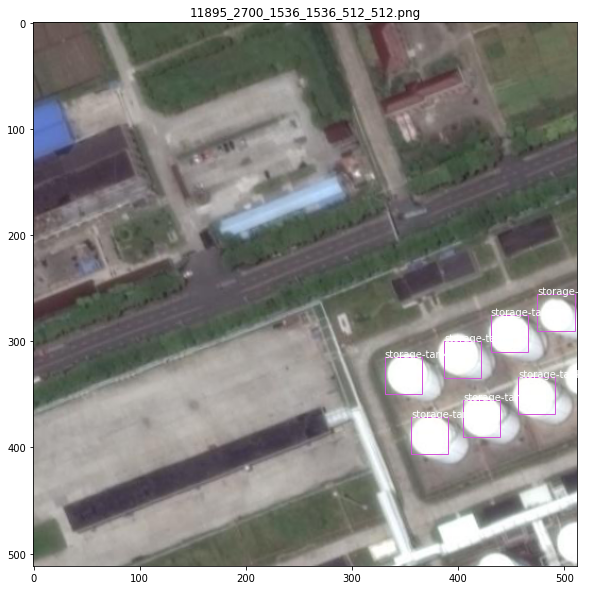

<Figure size 432x288 with 0 Axes>

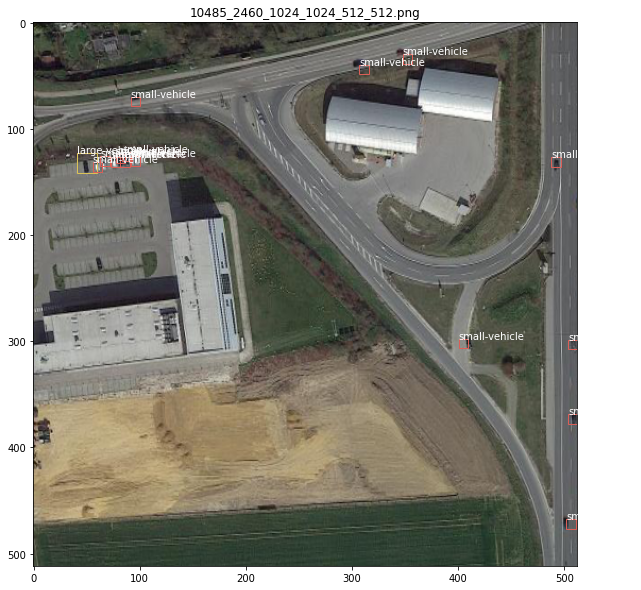

<Figure size 432x288 with 0 Axes>

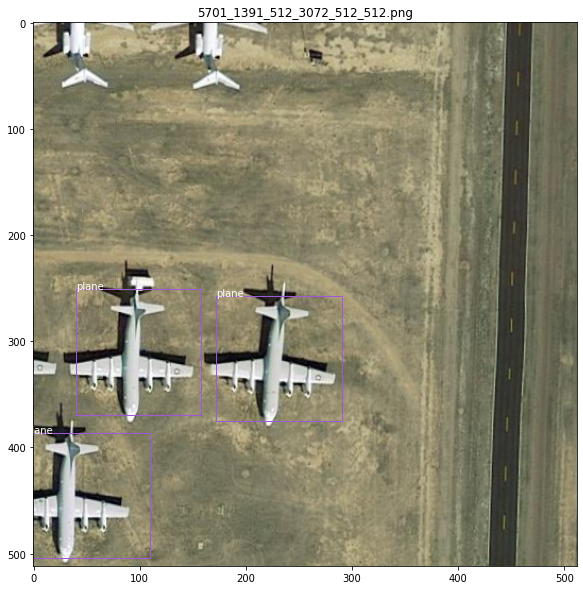

<Figure size 432x288 with 0 Axes>

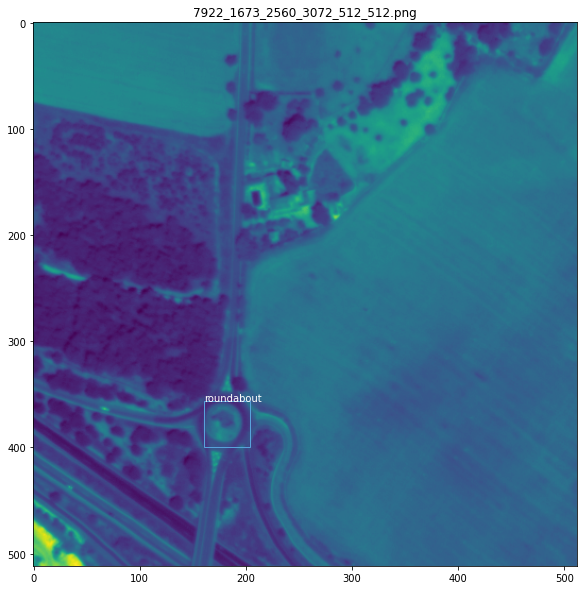

In [11]:
display_random_ims(10, train_anns_sq, train_ims_c, (10,10))

In [ ]:
shutil.make_archive('DOTA_512', 'zip', 'DOTA_512')

'/content/DOTA_512.zip'

In [ ]:
data_zip_path = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/DOTA/DOTA_512.zip'
shutil.copy2('DOTA_512.zip', data_zip_path)

'/content/drive/MyDrive/Colab Notebooks/Clean Datasets/DOTA/DOTA_512.zip'